In [1]:
%env CUDA_VISIBLE_DEVICES=4
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
sys.path += [
    "/home/lcw/openvla-oft",
    "/home/lcw/openvla-oft/vla-scripts",
]

import tensorflow_datasets as tfds
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from transformers import AutoProcessor

from finetune import (
    FinetuneConfig,
    RLDSBatchTransform_epi,
    ActionTokenizer,
    PurePromptBuilder,
)

# 설정
cfg = FinetuneConfig(
    vla_path="openvla/openvla-7b",
    data_root_dir=Path("/home/lcw/openvla-oft/datasets/modified_libero_rlds"),
    dataset_name="libero_10_no_noops",
    num_images_in_input=2,
    use_proprio=True,
    image_aug=False,
)

version_dir = cfg.data_root_dir / cfg.dataset_name / "1.0.0"
builder = tfds.builder_from_directory(version_dir)
builder.download_and_prepare()

processor = AutoProcessor.from_pretrained(cfg.vla_path, trust_remote_code=True)
action_tok = ActionTokenizer(processor.tokenizer)

batch_transform = RLDSBatchTransform_epi(
    action_tokenizer = action_tok,
    base_tokenizer   = processor.tokenizer,
    image_transform  = processor.image_processor.apply_transform,
    prompt_builder_fn= PurePromptBuilder,
    use_wrist_image  = cfg.num_images_in_input > 1,
    use_proprio      = cfg.use_proprio,
)

# 🔥 수정 1: 올바른 클래스 사용
from prismatic.vla.datasets.datasets import RLDSDataset_epi

train_dataset = RLDSDataset_epi(
    data_root_dir       = cfg.data_root_dir,
    data_mix            = cfg.dataset_name,
    batch_transform     = batch_transform,
    resize_resolution   = tuple(processor.image_processor.input_sizes[0][1:]),
    shuffle_buffer_size = 100,
    train               = True,
    image_aug           = cfg.image_aug,
)

env: CUDA_VISIBLE_DEVICES=4


/home/lcw/miniconda3/envs/openvla-oft/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-06-30 22:28:02.825282: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-30 22:28:02.866129: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-30 22:28:02.866162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-30 22

Using LIBERO constants:
  NUM_ACTIONS_CHUNK = 8
  ACTION_DIM = 7
  PROPRIO_DIM = 8
  ACTION_PROPRIO_NORMALIZATION_TYPE = bounds_q99
If needed, manually set the correct constants in `prismatic/vla/constants.py`!


2025-06-30 22:28:21.910333: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


06/30 [22:28:22] INFO     | >> [*] Loading existing dataset statistics from                       ]8;id=952345;file:///home/lcw/openvla-oft/prismatic/vla/datasets/rlds/utils/data_utils.py\data_utils.py]8;;\:]8;id=879364;file:///home/lcw/openvla-oft/prismatic/vla/datasets/rlds/utils/data_utils.py#201\201]8;;\
                          /home/lcw/openvla-oft/datasets/modified_libero_rlds/libero_10_no_noops/                  
                          1.0.0/dataset_statistics_f1f4cb06e922a6979da3f480f311f18217dce47441ef4b                  
                          608b3eaaa06c950589.json.                                                                 

2025-06-30 22:28:22.446894: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


=== MemoryGridGenerator 직접 테스트 ===
MemoryGridGenerator 타입: <class 'prismatic.vla.datasets.datasets.MemoryGridGenerator'>
현재 상태: {'tile_size': 128, 'output_size': 224, 'available_positions': [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (0, 2), (0, 3)]}
테스트 이미지 1 생성: 색상 (255, 100, 100)
테스트 이미지 2 생성: 색상 (100, 255, 100)
테스트 이미지 3 생성: 색상 (100, 100, 255)
테스트 이미지 4 생성: 색상 (255, 255, 100)
테스트 이미지 5 생성: 색상 (255, 100, 255)
테스트 이미지 6 생성: 색상 (100, 255, 255)
테스트 이미지 7 생성: 색상 (255, 200, 100)
테스트 이미지 8 생성: 색상 (200, 100, 255)

=== 점진적 메모리 그리드 생성 ===

스텝 1: 1개 이미지로 그리드 생성
  ✅ 성공: 그리드 크기 (224, 224)

스텝 2: 2개 이미지로 그리드 생성
  ✅ 성공: 그리드 크기 (224, 224)

스텝 3: 3개 이미지로 그리드 생성
  ✅ 성공: 그리드 크기 (224, 224)

스텝 4: 4개 이미지로 그리드 생성
  ✅ 성공: 그리드 크기 (224, 224)

스텝 5: 5개 이미지로 그리드 생성
  ✅ 성공: 그리드 크기 (224, 224)

스텝 6: 6개 이미지로 그리드 생성
  ✅ 성공: 그리드 크기 (224, 224)

=== 생성된 6개 그리드 시각화 ===


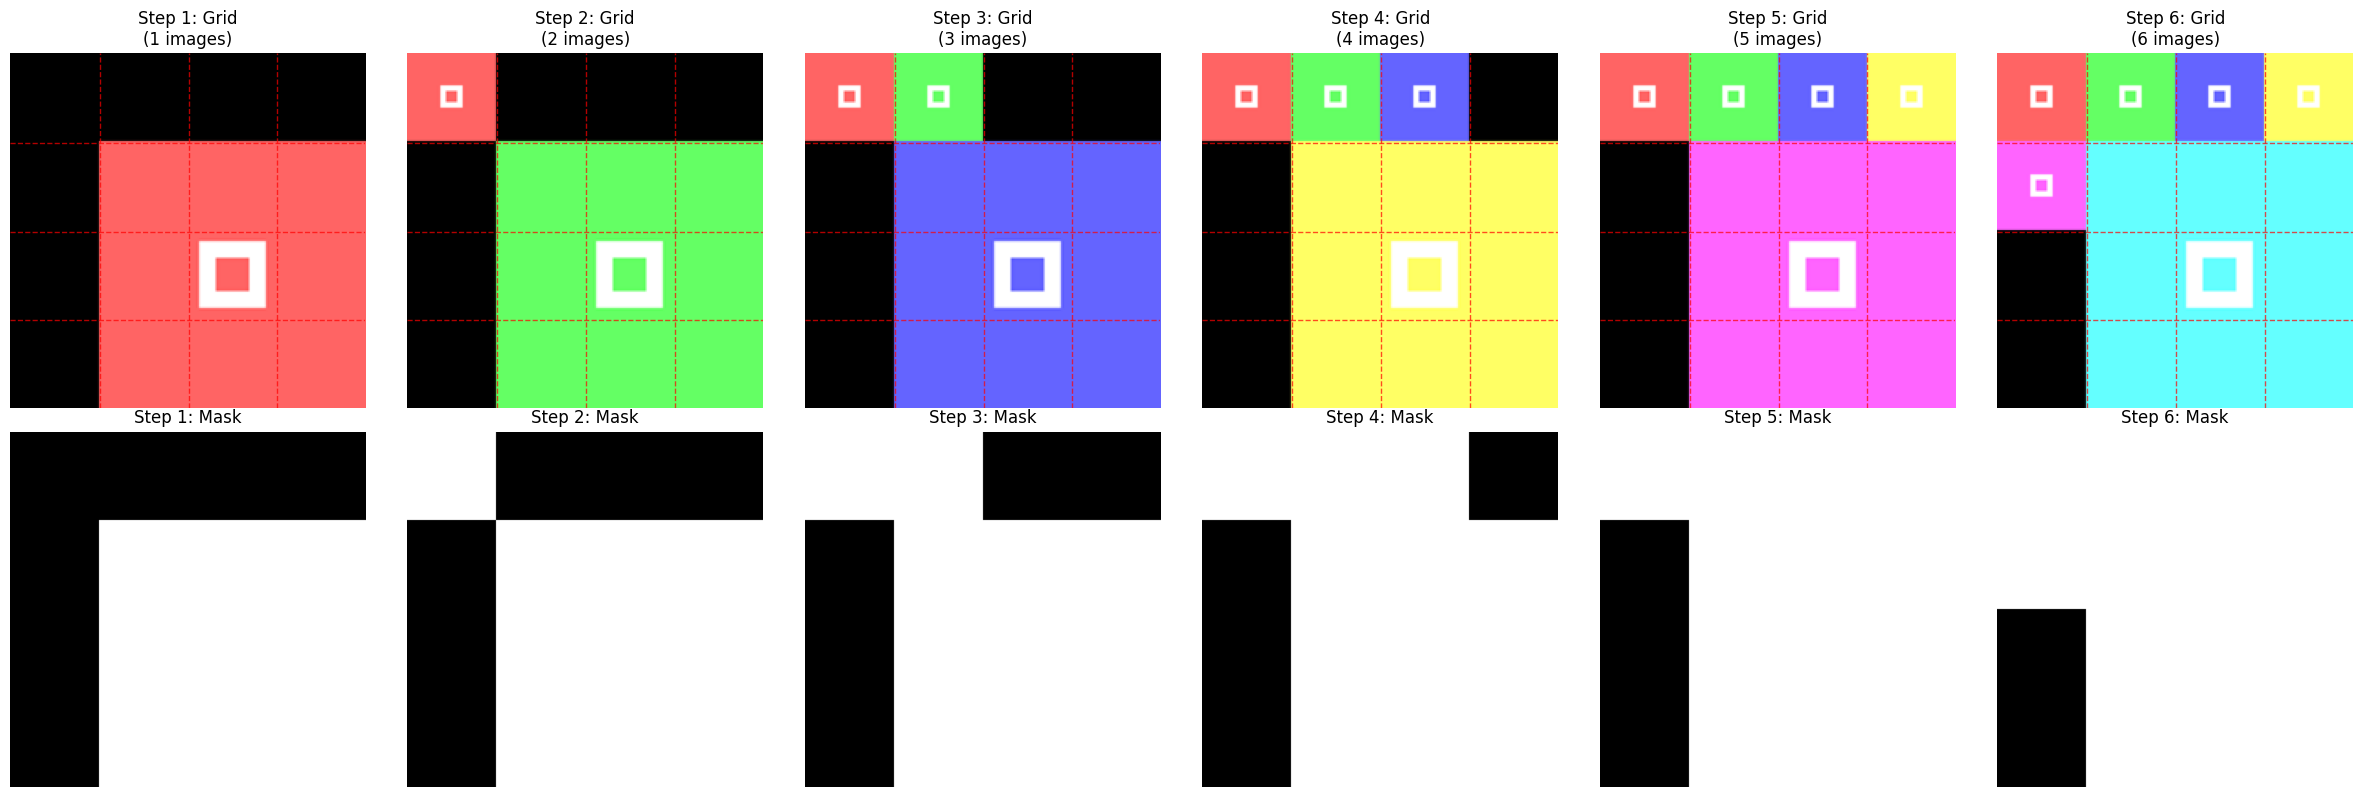


=== 실제 데이터셋 vs 직접 생성 비교 ===
[EPISODE 1] Processing 230 steps
[FIRST EPISODE] Starting episode 1 with task: 'put the white mug on the left plate and put the ye...'
[EPISODE TRANSITION] None -> libero_10_no_noops_ep_1
[STEP 10] Episode libero_10_no_noops_ep_1: 8 primary + 8 wrist → dual memory grid
[STEP 20] Episode libero_10_no_noops_ep_1: 8 primary + 8 wrist → dual memory grid
[STEP 30] Episode libero_10_no_noops_ep_1: 8 primary + 8 wrist → dual memory grid
[STEP 40] Episode libero_10_no_noops_ep_1: 8 primary + 8 wrist → dual memory grid
[STEP 50] Episode libero_10_no_noops_ep_1: 8 primary + 8 wrist → dual memory grid
[STEP 60] Episode libero_10_no_noops_ep_1: 8 primary + 8 wrist → dual memory grid
[STEP 70] Episode libero_10_no_noops_ep_1: 8 primary + 8 wrist → dual memory grid
[STEP 80] Episode libero_10_no_noops_ep_1: 8 primary + 8 wrist → dual memory grid
[STEP 90] Episode libero_10_no_noops_ep_1: 8 primary + 8 wrist → dual memory grid
[STEP 100] Episode libero_10_no_noops_ep_1: 8

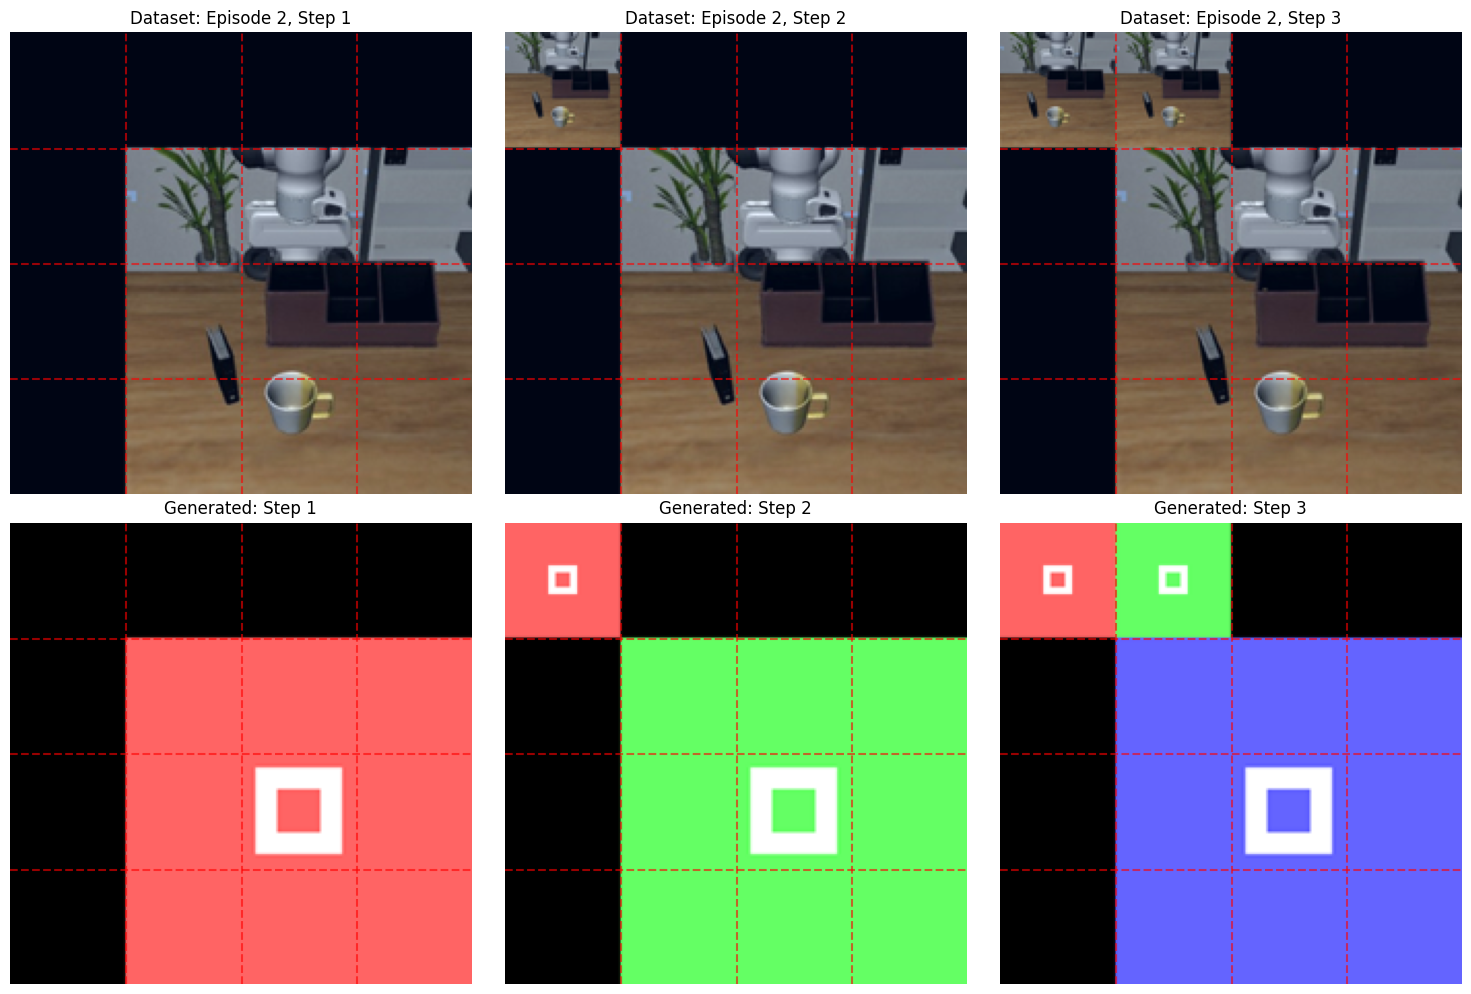


=== 분석 포인트 ===
1. 직접 생성한 그리드:
   - 각 스텝마다 이미지가 추가되면서 과거 이미지들이 작은 타일로 이동
   - 현재 이미지는 항상 중앙 영역에 큰 크기로 표시
   - 색상이 명확히 구분되어 메모리 구조 확인 가능

2. 실제 데이터셋:
   - 실제 로봇 카메라 이미지들이 메모리 그리드로 구성
   - 두 번째 에피소드 첫 스텝에서 과거 영역이 비어있는지 확인
   - 스텝이 진행되면서 과거 이미지들이 누적되는지 확인

=== MemoryGridGenerator 직접 테스트 완료 ===


In [2]:
# MemoryGridGenerator의 실제 작동 과정 확인

print("=== MemoryGridGenerator 직접 테스트 ===")

from PIL import Image
import numpy as np

# 1. MemoryGridGenerator 직접 접근
generator = batch_transform.generator
print(f"MemoryGridGenerator 타입: {type(generator)}")
print(f"현재 상태: {generator.__dict__ if hasattr(generator, '__dict__') else 'No dict'}")

# 2. 테스트용 서로 다른 이미지들 생성
def create_test_image(color, step_num, size=(128, 128)):
    """테스트용 이미지 생성 - 각 스텝마다 다른 색상과 번호"""
    img_array = np.full((*size, 3), color, dtype=np.uint8)
    
    # 스텝 번호를 시각적으로 표시 (흰색 사각형)
    h, w = size
    rect_size = min(h, w) // 4
    start_h, start_w = h//2 - rect_size//2, w//2 - rect_size//2
    img_array[start_h:start_h+rect_size, start_w:start_w+rect_size] = [255, 255, 255]
    
    # 번호 영역에 색상 점 추가
    center_h, center_w = h//2, w//2
    dot_size = 8
    img_array[center_h-dot_size:center_h+dot_size, 
              center_w-dot_size:center_w+dot_size] = color
    
    return Image.fromarray(img_array)

# 3. 서로 다른 색상의 테스트 이미지들 생성
test_colors = [
    (255, 100, 100),  # 빨강
    (100, 255, 100),  # 초록
    (100, 100, 255),  # 파랑
    (255, 255, 100),  # 노랑
    (255, 100, 255),  # 마젠타
    (100, 255, 255),  # 시안
    (255, 200, 100),  # 주황
    (200, 100, 255),  # 보라
]

test_images = []
for i, color in enumerate(test_colors):
    img = create_test_image(color, i+1)
    test_images.append(img)
    print(f"테스트 이미지 {i+1} 생성: 색상 {color}")

# 4. MemoryGridGenerator로 점진적 그리드 생성
print("\n=== 점진적 메모리 그리드 생성 ===")

generated_grids = []
for i in range(1, min(len(test_images) + 1, 7)):  # 최대 6개까지
    current_images = test_images[:i]
    print(f"\n스텝 {i}: {len(current_images)}개 이미지로 그리드 생성")
    
    try:
        # 실제 MemoryGridGenerator 호출
        grid_img, mask_img = generator.make_memory_grid(current_images)
        generated_grids.append({
            'grid': grid_img,
            'mask': mask_img,
            'step': i,
            'image_count': len(current_images)
        })
        print(f"성공: 그리드 크기 {grid_img.size}")
        
    except Exception as e:
        print(f"에러: {e}")
        break

# 5. 생성된 그리드들 시각화
if generated_grids:
    print(f"\n=== 생성된 {len(generated_grids)}개 그리드 시각화 ===")
    
    # 2행으로 배치 (위: 그리드, 아래: 마스크)
    fig, axes = plt.subplots(2, len(generated_grids), figsize=(4*len(generated_grids), 8))
    
    if len(generated_grids) == 1:
        axes = axes.reshape(2, 1)
    
    for i, grid_data in enumerate(generated_grids):
        # 그리드 이미지
        axes[0, i].imshow(grid_data['grid'])
        axes[0, i].set_title(f"Step {grid_data['step']}: Grid\n({grid_data['image_count']} images)")
        axes[0, i].axis('off')
        
        # 그리드 구조 표시
        h, w = 224, 224
        for j in range(1, 4):
            axes[0, i].axhline(y=j*h/4, color='red', linestyle='--', alpha=0.7, linewidth=1)
            axes[0, i].axvline(x=j*w/4, color='red', linestyle='--', alpha=0.7, linewidth=1)
        
        # 마스크 이미지
        if grid_data['mask'] is not None:
            axes[1, i].imshow(grid_data['mask'], cmap='gray')
            axes[1, i].set_title(f"Step {grid_data['step']}: Mask")
        else:
            axes[1, i].text(0.5, 0.5, 'No Mask', ha='center', va='center', transform=axes[1, i].transAxes)
            axes[1, i].set_title(f"Step {grid_data['step']}: No Mask")
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# 6. 실제 데이터셋과 비교
print("\n=== 실제 데이터셋 vs 직접 생성 비교 ===")

# 실제 데이터셋에서 두 번째 에피소드 첫 몇 스텝 가져오기
actual_samples = []
episode_count = 0
current_ep_id = None

for sample in train_dataset:
    ep_id = sample.get('episode_id', 'unknown')
    
    if ep_id != current_ep_id:
        episode_count += 1
        current_ep_id = ep_id
        
    if episode_count == 2:  # 두 번째 에피소드
        actual_samples.append(sample)
        if len(actual_samples) >= 3:  # 첫 3개 스텝만
            break

if actual_samples:
    print(f"두 번째 에피소드에서 {len(actual_samples)}개 샘플 수집")
    
    # 비교 시각화
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, sample in enumerate(actual_samples):
        # 실제 데이터셋 메모리 그리드
        pixel_values = sample['pixel_values'][:3].permute(1, 2, 0)
        if pixel_values.max() > 1.0 or pixel_values.min() < 0.0:
            pixel_values = (pixel_values - pixel_values.min()) / (pixel_values.max() - pixel_values.min())
        
        axes[0, i].imshow(pixel_values.cpu().numpy() if hasattr(pixel_values, 'cpu') else pixel_values)
        axes[0, i].set_title(f"Dataset: Episode 2, Step {i+1}")
        axes[0, i].axis('off')
        
        # 그리드 라인
        for j in range(1, 4):
            axes[0, i].axhline(y=j*224/4, color='red', linestyle='--', alpha=0.6)
            axes[0, i].axvline(x=j*224/4, color='red', linestyle='--', alpha=0.6)
        
        # 직접 생성한 그리드 (있다면)
        if i < len(generated_grids):
            axes[1, i].imshow(generated_grids[i]['grid'])
            axes[1, i].set_title(f"Generated: Step {i+1}")
            axes[1, i].axis('off')
            
            # 그리드 라인
            for j in range(1, 4):
                axes[1, i].axhline(y=j*224/4, color='red', linestyle='--', alpha=0.6)
                axes[1, i].axvline(x=j*224/4, color='red', linestyle='--', alpha=0.6)
        else:
            axes[1, i].text(0.5, 0.5, 'No Generated\nGrid', ha='center', va='center', 
                           transform=axes[1, i].transAxes)
            axes[1, i].set_title(f"Generated: N/A")
    
    plt.tight_layout()
    plt.show()

print("\n=== 분석 포인트 ===")
print("1. 직접 생성한 그리드:")
print("   - 각 스텝마다 이미지가 추가되면서 과거 이미지들이 작은 타일로 이동")
print("   - 현재 이미지는 항상 중앙 영역에 큰 크기로 표시")
print("   - 색상이 명확히 구분되어 메모리 구조 확인 가능")
print("\n2. 실제 데이터셋:")
print("   - 실제 로봇 카메라 이미지들이 메모리 그리드로 구성")
print("   - 두 번째 에피소드 첫 스텝에서 과거 영역이 비어있는지 확인")
print("   - 스텝이 진행되면서 과거 이미지들이 누적되는지 확인")

print("\n=== MemoryGridGenerator 직접 테스트 완료 ===")